# Technical Indicators
## 2018321078 정유진

0. 라이브러리

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from iexfinance import get_historical_data
from datetime import datetime


1. 데이터 끌어오기 (iexfinance, 애플, 2017년도)

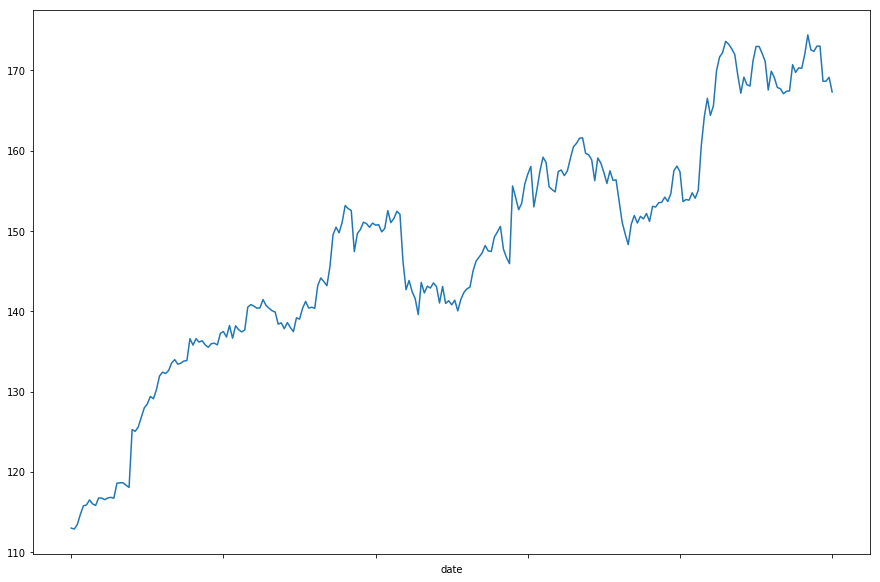

In [4]:
start_date='2017-01-01'
end_date='2018-01-01'
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)
 
data = get_historical_data('AAPL', start=start_date, end=end_date, output_format='pandas')
plt.figure(figsize = (15,10)) 
data.close.plot()
plt.show()

2. Moving Average Oscillator

In [8]:
def ema(series, periods, fillna=False):
    if fillna:
        return series.ewm(span=periods, min_periods=0).mean()
    return series.ewm(span=periods, min_periods=periods).mean()


def maOsc(df, n_short, n_long, fillna=False):
    ema_short = ema(df.close, n_short, fillna)
    ema_long = ema(df.close, n_long, fillna)
    macd = ema_short - ema_long
    if fillna:
        maOsc = macd.replace([np.inf, -np.inf], np.nan).fillna(0)
    result = pd.Series(macd, name='MA_Short%d_Long%d' % (n_short, n_long))
    df = df.join(result)
    #visualize
    plt.figure(figsize=(15,10))
    plt.plot(result,'-g')
    plt.axhline(0, color='cyan')
    return df

,open,high,low,close,volume,MA_Short10_Long30
date,,,,,,
2017-01-03,112.6732,113.1889,111.6613,113.0138,28781865,NaN
2017-01-04,112.7219,113.3641,112.6246,112.8873,21118116,NaN
2017-01-05,112.7900,113.7087,112.6830,113.4614,22193587,NaN
2017-01-06,113.6268,114.9695,113.3251,114.7263,31751900,NaN
2017-01-09,114.7652,116.2052,114.7554,115.7771,33561948,NaN


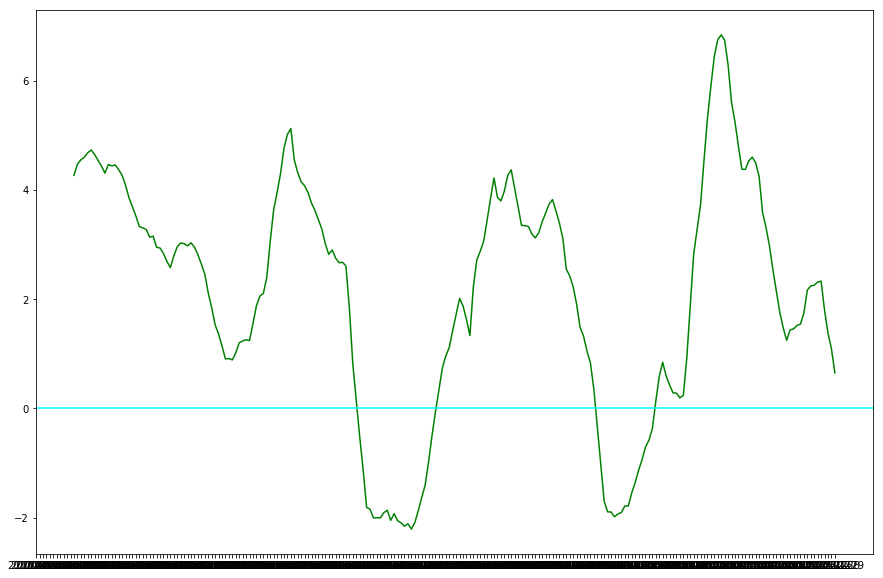

In [9]:
maOsc(data,10,30).head()

3. Chaikin Oscillator

In [11]:
def Chaikin(df):
    ad = (2 * df['close'] - df['high'] - df['low']) / (df['high'] - df['low']) * df['volume']
    Chaikin = pd.Series(pd.ewma(ad, span = 3, min_periods = 2) - 
                        pd.ewma(ad, span = 10, min_periods = 9), name = 'Chaikin')
    df = df.join(Chaikin)
    #visualize
    plt.figure(figsize = (15,10))
    plt.plot(df['Chaikin'],'-m')
    plt.axhline(0, color='cyan')
    return df

'''
ewma; exponentially moving average 

'''

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=3,min_periods=2,adjust=True,ignore_na=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=9,adjust=True,ignore_na=False).mean()
  after removing the cwd from sys.path.


,open,high,low,close,volume,Chaikin
date,,,,,,
2017-12-22,172.6967,173.4323,172.5188,173.0230,16349444,-7.855528e+05
2017-12-26,168.8608,169.5232,167.7525,168.6334,33185536,-9.453602e+05
2017-12-27,168.1687,168.8410,167.7831,168.6630,21498213,3.666737e+06
2017-12-28,169.0585,169.8988,168.5444,169.1376,16480187,3.127662e+04
2017-12-29,168.5839,168.6531,167.2987,167.3086,25999922,-8.960135e+06


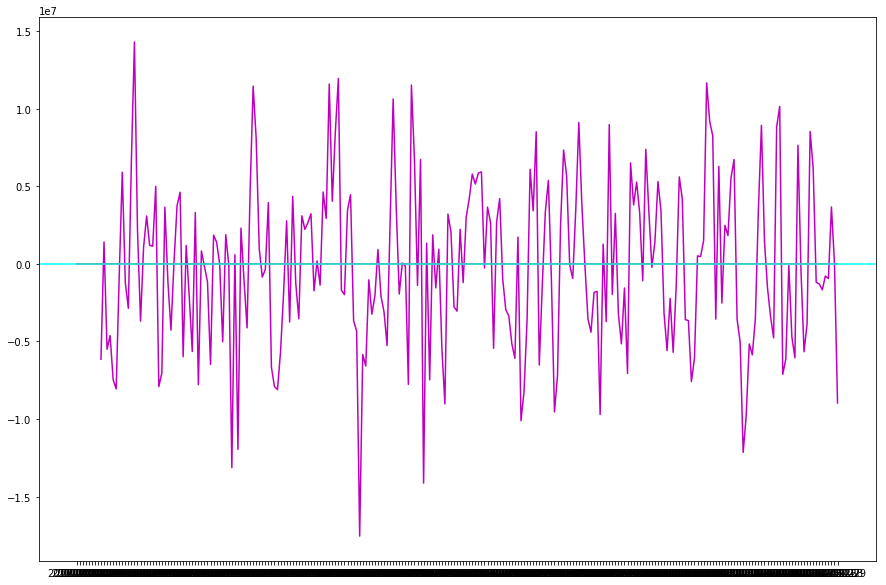

In [12]:
Chaikin(data).tail()

4. Detrended Price Oscillator

In [7]:
def dpo(df, n, fillna=False):
    dpo = df['close'].shift(int((0.5 * n) + 1)) - df['close'].rolling(n).mean()
    if fillna:
        dpo = dpo.replace([np.inf, -np.inf], np.nan).fillna(0)
    result = pd.Series(dpo, name='dpo_'+str(n))
    df = df.join(result)
    #visualize
    plt.figure(figsize = (15,10))
    plt.plot(result,'-b')
    plt.axhline(0, color='cyan')
    return df

,open,high,low,close,volume,dpo_30
date,,,,,,
2017-12-22,172.6967,173.4323,172.5188,173.0230,16349444,-0.418570
2017-12-26,168.8608,169.5232,167.7525,168.6334,33185536,-1.074357
2017-12-27,168.1687,168.8410,167.7831,168.6630,21498213,-2.199097
2017-12-28,169.0585,169.8988,168.5444,169.1376,16480187,-2.348730
2017-12-29,168.5839,168.6531,167.2987,167.3086,25999922,-2.976473


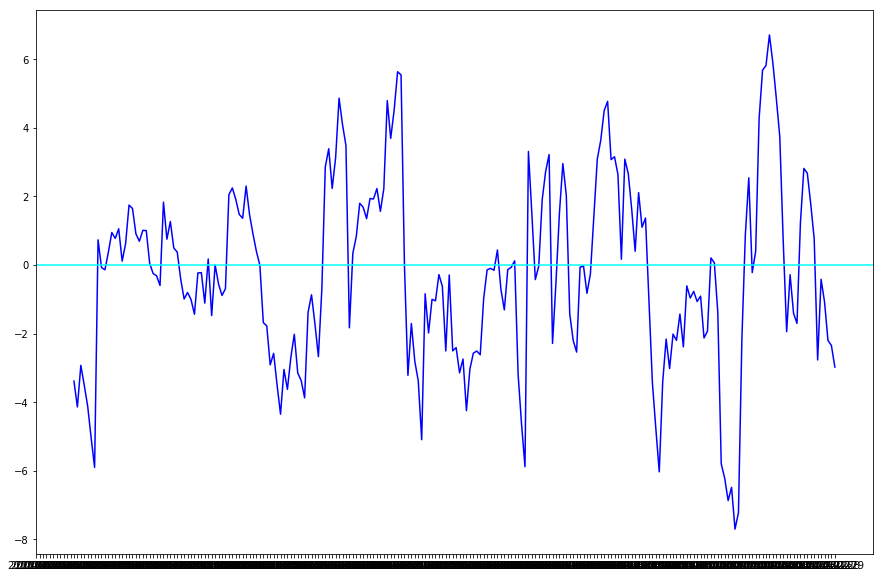

In [8]:
dpo(data,30).tail()